# Language model

In [1]:
import tensorflow as tf
import numpy as np 

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

### Download the dataset (Harry Potter book)

In [2]:
data = open('book1.txt',encoding="utf8").read()
data

'/ \n\n\n\n\nTHE BOY WHO LIVED \n\nMr. and Mrs. Dursley, of number four, Privet Drive, \nwere proud to say that they were perfectly normal, \nthank you very much. They were the last people you’d \nexpect to be involved in anything strange or \nmysterious, because they just didn’t hold with such \nnonsense. \n\nMr. Dursley was the director of a firm called \nGrunnings, which made drills. He was a big, beefy \nman with hardly any neck, although he did have a \nvery large mustache. Mrs. Dursley was thin and \nblonde and had nearly twice the usual amount of \nneck, which came in very useful as she spent so \nmuch of her time craning over garden fences, spying \non the neighbors. The Dursley s had a small son \ncalled Dudley and in their opinion there was no finer \nboy anywhere. \n\nThe Dursleys had everything they wanted, but they \nalso had a secret, and their greatest fear was that \nsomebody would discover it. They didn’t think they \ncould bear it if anyone found out about the Potters

### Cleaning the data

In [3]:
# Lowercase and split the text
cor = data.lower()

# Preview the result
#print(corpus)
import re
#res = re.sub(r'[,()''""[]:]', '', cor)
res = re.sub(r'[^\w\s,''!?.]', '', cor) #replace all except word and spaces , ''?!   
res
res1 = re.sub(r'[\n]', '', res)
[res1]

[' the boy who lived mr. and mrs. dursley, of number four, privet drive, were proud to say that they were perfectly normal, thank you very much. they were the last people youd expect to be involved in anything strange or mysterious, because they just didnt hold with such nonsense. mr. dursley was the director of a firm called grunnings, which made drills. he was a big, beefy man with hardly any neck, although he did have a very large mustache. mrs. dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. the dursley s had a small son called dudley and in their opinion there was no finer boy anywhere. the dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. they didnt think they could bear it if anyone found out about the potters. mrs. potter was mrs. dursleys sister, but they hadnt page

In [4]:
res1 = re.sub('page  \d harry potter and the philosophers stone  j.k. rowling', '', res1)
res1 = re.sub('page  \d\d harry potter and the philosophers stone  j.k. rowling', '', res1)
res1 = re.sub('page  \d\d\d harry potter and the philosophers stone  j.k. rowling', '', res1)
res1 = re.sub('page  \d\d\d\d harry potter and the philosophers stone  j.k. rowling', '', res1)

res1

' the boy who lived mr. and mrs. dursley, of number four, privet drive, were proud to say that they were perfectly normal, thank you very much. they were the last people youd expect to be involved in anything strange or mysterious, because they just didnt hold with such nonsense. mr. dursley was the director of a firm called grunnings, which made drills. he was a big, beefy man with hardly any neck, although he did have a very large mustache. mrs. dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. the dursley s had a small son called dudley and in their opinion there was no finer boy anywhere. the dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. they didnt think they could bear it if anyone found out about the potters. mrs. potter was mrs. dursleys sister, but they hadnt  met 

### Tokenizing the words and punctuations

In [5]:
import re
import string
from tensorflow.keras.preprocessing.text import Tokenizer

def pad_punctuation(s): return re.sub(f"([{string.punctuation}])", r' \1 ', s)

S = [pad_punctuation(s) for s in [res1]]

tokenizer = Tokenizer(filters='')
tokenizer.fit_on_texts(S)
print(tokenizer.word_index)
total_words = len(tokenizer.word_index) + 1

print(f'word index dictionary: {tokenizer.word_index}')
print(f'total words: {total_words}')
print(S)

{'.': 1, ',': 2, 'the': 3, 'and': 4, 'to': 5, 'a': 6, 'he': 7, 'of': 8, 'harry': 9, 'was': 10, 'it': 11, 'in': 12, 'his': 13, 'you': 14, 'said': 15, '?': 16, 'had': 17, 'i': 18, 'on': 19, 'at': 20, 'that': 21, 'they': 22, 'as': 23, 'him': 24, 'but': 25, '!': 26, 'with': 27, 'ron': 28, 'all': 29, 'out': 30, 'for': 31, 'up': 32, 'be': 33, 'hagrid': 34, 'what': 35, 'were': 36, 'them': 37, 'have': 38, 'there': 39, 'hermione': 40, 'back': 41, 'one': 42, 'this': 43, 'if': 44, 'from': 45, 'so': 46, 'its': 47, 'not': 48, 'she': 49, 'about': 50, 'into': 51, 'an': 52, 'their': 53, 'me': 54, 'been': 55, 'off': 56, 'got': 57, 'didnt': 58, 'no': 59, 'could': 60, 'get': 61, 'like': 62, 'know': 63, 'just': 64, 'see': 65, 'down': 66, 'her': 67, 'professor': 68, 'when': 69, 'is': 70, 'very': 71, 'over': 72, 'looked': 73, 'do': 74, 'now': 75, 'then': 76, 'who': 77, 'are': 78, 'we': 79, 'snape': 80, 'by': 81, 'your': 82, 'dont': 83, 'dumbledore': 84, 'around': 85, 'hed': 86, 'well': 87, 'how': 88, 'going

### Splitting the corpus into arrays of length 9 to pass into the LSTM's later

In [8]:
token_list = tokenizer.texts_to_sequences(S)[0]
token_list[0:5]
split_token_list = []
i = 1
list_length = 9
split_token_list.append(token_list[0:9])
while i <= len(token_list)/9:
    split_token_list.append(token_list[i*list_length:(i*list_length)+list_length])
    i = i+1


In [9]:
split_token_list

[[3, 145, 77, 1045, 149, 1, 4, 259, 1],
 [219, 2, 8, 611, 350, 2, 634, 521, 2],
 [36, 1223, 5, 162, 21, 22, 36, 1517, 939],
 [2, 1119, 14, 71, 159, 1, 22, 36, 3],
 [146, 133, 475, 755, 5, 33, 1518, 12, 169],
 [476, 106, 1367, 2, 143, 22, 64, 58, 815],
 [27, 496, 1710, 1, 149, 1, 219, 10, 3],
 [2555, 8, 6, 2556, 270, 2557, 2, 140, 186],
 [1368, 1, 7, 10, 6, 396, 2, 3451, 341],
 [27, 477, 194, 574, 2, 866, 7, 118, 38],
 [6, 71, 234, 1369, 1, 259, 1, 219, 10],
 [940, 4, 2558, 4, 17, 305, 668, 3, 575],
 [3452, 8, 574, 2, 140, 163, 12, 71, 1370],
 [23, 49, 867, 46, 159, 8, 67, 99, 2559],
 [72, 1371, 3453, 2, 2037, 19, 3, 2038, 1],
 [3, 219, 315, 17, 6, 351, 1046, 270, 100],
 [4, 12, 53, 1519, 39, 10, 59, 2560, 145],
 [1224, 1, 3, 235, 17, 376, 22, 260, 2],
 [25, 22, 669, 17, 6, 670, 2, 4, 53],
 [1520, 941, 10, 21, 2039, 108, 3454, 11, 1],
 [22, 58, 96, 22, 60, 1521, 11, 44, 306],
 [178, 30, 50, 3, 544, 1, 259, 1, 116],
 [10, 259, 1, 235, 701, 2, 25, 22, 224],
 [545, 31, 756, 228, 12, 671, 2

In [10]:
len(split_token_list)

10089

### Generating the dataset

In [12]:
input_sequences = []

# Loop over every line
for line in split_token_list:

	# Tokenize the current line
#	token_list = tokenizer.texts_to_sequences([line])[0] #just line will have a string. [line] will make it a list.
    #text_to_sequence generates list of list ( [[1,2,6,8,4]] ). So [0] is used.

	# Loop over the line several times to generate the subphrases
	for i in range(1, len(line)):
		
		# Generate the subphrase
		n_gram_sequence = line[:i+1]

		# Append the subphrase to the sequences list
		input_sequences.append(n_gram_sequence)
input_sequences

max_sequence_len = max([len(x) for x in input_sequences])

# Pad all sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create inputs and label by splitting the last token in the subphrases
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [13]:
xs[0:10]

array([[   0,    0,    0,    0,    0,    0,    0,    3],
       [   0,    0,    0,    0,    0,    0,    3,  145],
       [   0,    0,    0,    0,    0,    3,  145,   77],
       [   0,    0,    0,    0,    3,  145,   77, 1045],
       [   0,    0,    0,    3,  145,   77, 1045,  149],
       [   0,    0,    3,  145,   77, 1045,  149,    1],
       [   0,    3,  145,   77, 1045,  149,    1,    4],
       [   3,  145,   77, 1045,  149,    1,    4,  259],
       [   0,    0,    0,    0,    0,    0,    0,  219],
       [   0,    0,    0,    0,    0,    0,  219,    2]])

In [15]:
ys[:10]   #one-hot representation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Building the model

In [16]:
# Hyperparameters
embedding_dim = 128
lstm_units = 64
learning_rate = 0.001

# Build the model
model = Sequential([
          Embedding(total_words, embedding_dim, input_length=max_sequence_len-1),
          Bidirectional(LSTM(lstm_units)),
          Dense(total_words, activation='softmax')
])

# Use categorical crossentropy because this is a multi-class problem
model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=['accuracy']
    )

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 8, 128)            770944    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense (Dense)               (None, 6023)              776967    
                                                                 
Total params: 1,646,727
Trainable params: 1,646,727
Non-trainable params: 0
_________________________________________________________________


In [17]:
epochs = 100

# Train the model
history = model.fit(xs, ys, epochs=epochs)

Epoch 1/100
2523/2523 [==============================] - 92s 33ms/step - loss: 6.1611 - accuracy: 0.0779
Epoch 2/100
2523/2523 [==============================] - 85s 34ms/step - loss: 5.4773 - accuracy: 0.1239
Epoch 3/100
2523/2523 [==============================] - 85s 34ms/step - loss: 5.0739 - accuracy: 0.1550
Epoch 4/100
2523/2523 [==============================] - 84s 33ms/step - loss: 4.7713 - accuracy: 0.1739
Epoch 5/100
2523/2523 [==============================] - 85s 34ms/step - loss: 4.4923 - accuracy: 0.1934
Epoch 6/100
2523/2523 [==============================] - 85s 34ms/step - loss: 4.2302 - accuracy: 0.2121
Epoch 7/100
2523/2523 [==============================] - 87s 34ms/step - loss: 3.9833 - accuracy: 0.2333
Epoch 8/100
2523/2523 [==============================] - 86s 34ms/step - loss: 3.7559 - accuracy: 0.2589
Epoch 9/100
2523/2523 [==============================] - 85s 34ms/step - loss: 3.5412 - accuracy: 0.2863
Epoch 10/100
2523/2523 [==============================]

2523/2523 [==============================] - 80s 32ms/step - loss: 0.7319 - accuracy: 0.8214
Epoch 79/100
2523/2523 [==============================] - 76s 30ms/step - loss: 0.7255 - accuracy: 0.8244
Epoch 80/100
2523/2523 [==============================] - 77s 31ms/step - loss: 0.7236 - accuracy: 0.8229
Epoch 81/100
2523/2523 [==============================] - 78s 31ms/step - loss: 0.7242 - accuracy: 0.8229
Epoch 82/100
2523/2523 [==============================] - 79s 31ms/step - loss: 0.7196 - accuracy: 0.8237
Epoch 83/100
2523/2523 [==============================] - 80s 32ms/step - loss: 0.7154 - accuracy: 0.8253
Epoch 84/100
2523/2523 [==============================] - 76s 30ms/step - loss: 0.7128 - accuracy: 0.8255
Epoch 85/100
2523/2523 [==============================] - 80s 32ms/step - loss: 0.7091 - accuracy: 0.8257
Epoch 86/100
2523/2523 [==============================] - 80s 32ms/step - loss: 0.7098 - accuracy: 0.8249
Epoch 87/100
2523/2523 [==============================] - 7

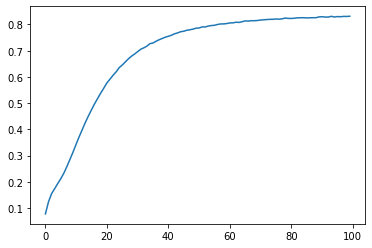

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

## Generating text based on learned LSTM's

In [27]:
# Define seed text
seed_text = "hermione"

# Define total words to predict
next_words =20

# Loop until desired length is reached
for _ in range(next_words):

	# Convert the seed text to a token sequence
	token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# Pad the sequence
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	
	# Feed to the model and get the probabilities for each index
	probabilities = model.predict(token_list)

	# Get the index with the highest probability
	predicted = np.argmax(probabilities, axis=-1)[0]

	# Ignore if index is 0 because that is just the padding.
	if predicted != 0:
		
		# Look up the word associated with the index. 
		output_word = tokenizer.index_word[predicted]

		# Combine with the seed text
		seed_text += " " + output_word

# Print the result	
print(seed_text)

hermione , said a exams , can have were against his life , the better werent with harry , this time


In [29]:
# Define seed text
seed_text = "harry"

# Define total words to predict
next_words = 20

# Loop until desired length is reached
for _ in range(next_words):

	# Convert the seed text to a token sequence
  token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# Pad the sequence
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	
	# Feed to the model and get the probabilities for each index
  probabilities = model.predict(token_list)

  # Pick a random number from [1,2,3]
  choice = np.random.choice([1,2,3])
	
  # Sort the probabilities in ascending order 
  # and get the random choice from the end of the array
  predicted = np.argsort(probabilities)[0][-choice]

	# Ignore if index is 0 because that is just the padding.
  if predicted != 0:
		
		# Look up the word associated with the index. 
	  output_word = tokenizer.index_word[predicted]

		# Combine with the seed text
	  seed_text += " " + output_word

# Print the result	
print(seed_text)

harry had reached up and pulled out her wand lake and freckles , ill come and voldemort if you is that
